# 箱型图1

## 填充样式
- '/'：向右下的斜线。
- '\\'：向右上的斜线。
- '-'：水平线。
- '|'：竖直线。
- 'x'：交叉斜线。
- 'o'：圆点填充。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# 加载Excel文件
file_path = r'D:\Desktop\SITP\车辆sitp\code\聚类分析\sitp聚类\统计数据\kmeans++_clustering_results_for_3_0920.xlsx'  # 文件路径
df = pd.read_excel(file_path, sheet_name='Sheet1')  # 读取Excel文件中的Sheet1表格

# 确认数据中类簇的列名是否为 'cluster'，如果不是，请更改为正确的列名
if 'cluster' not in df.columns:
    print("请检查类簇的列名。")  # 如果没有找到“cluster”列，提示检查列名

# 获取不同类簇的max_speed数据
data_cluster_0 = df[df['cluster'] == 0]['region_time']  # 获取cluster 0的最大速度数据
data_cluster_1 = df[df['cluster'] == 1]['region_time']  # 获取cluster 1的最大速度数据
data_cluster_2 = df[df['cluster'] == 2]['region_time']  # 获取cluster 2的最大速度数据

# 创建箱型图
fig, ax = plt.subplots(figsize=(10, 6))  # 创建一个图表及其轴对象，设置图表大小

color = ["red","blue","purple"]
# 自定义每个箱型图的数据
custom_data = [
    {
        "data": data_cluster_0,  # cluster 0的数据
        "box_color": "white",  # 箱子填充颜色
        "hatch_color": f'{color[0]}',  # 斜线颜色
        "hatch": '/',  # 斜线填充样式
        "line_color":f'{color[0]}',  # 竖线颜色
        "whisker_color": f'{color[0]}',  # 上端和下端的横线颜色
        "median_color": f'{color[0]}',  # 中位数线的颜色
        "mean_color": 'darkred'  # 均值点的颜色
    },
    {
        "data": data_cluster_1,  # cluster 1的数据
        "box_color": 'white',  # 箱子填充颜色
        "hatch_color": f'{color[1]}',  # 斜线颜色
        "hatch": '\\',  # 斜线填充样式
        "line_color": f'{color[1]}',  # 竖线颜色
        "whisker_color": f'{color[1]}',  # 上端和下端的横线颜色
        "median_color":  f'{color[1]}',  # 中位数线的颜色
        "mean_color": 'darkred'  # 均值点的颜色
    },
    {
        "data": data_cluster_2,  # cluster 2的数据
        "box_color": 'white',  # 箱子填充颜色
        "hatch_color":  f'{color[2]}',  # 斜线颜色
        "hatch": 'x',  # 无斜线填充
        "line_color":  f'{color[2]}',  # 竖线颜色
        "whisker_color":  f'{color[2]}',  # 上端和下端的横线颜色
        "median_color":  f'{color[2]}',  # 中位数线的颜色
        "mean_color": 'darkred'  # 均值点的颜色
    }
]

for i, cd in enumerate(custom_data):
    data = cd["data"]  # 获取数据
    box_color = cd["box_color"]  # 获取箱子颜色
    hatch_color = cd["hatch_color"]  # 获取斜线颜色
    hatch = cd["hatch"]  # 获取填充图案
    line_color = cd["line_color"]  # 获取竖线颜色
    whisker_color = cd["whisker_color"]  # 获取上下端横线颜色
    median_color = cd["median_color"]  # 获取中位数线的颜色
    mean_color = cd["mean_color"]  # 获取均值点的颜色
    
    # 计算85%和15%的百分位数，均值和中位数
    percentile_85 = np.percentile(data, 85)  # 计算85百分位数
    percentile_15 = np.percentile(data, 15)  # 计算15百分位数
    mean_val = np.mean(data)  # 计算均值
    median_val = np.median(data)  # 计算中位数
    min_val = np.min(data)  # 计算最小值
    max_val = np.max(data)  # 计算最大值

    # 绘制箱型图元素
    # 绘制从最小值到箱子底部的竖线
    ax.plot([i + 1, i + 1], [min_val, percentile_15], color=line_color)  # 最小值到箱子底部的竖线
    # 绘制从最大值到箱子顶部的竖线
    ax.plot([i + 1, i + 1], [percentile_85, max_val], color=line_color)  # 最大值到箱子顶部的竖线
    
    # 绘制箱体
    ax.add_patch(plt.Rectangle(
        (i + 1 - 0.15, percentile_15), 0.3, percentile_85 - percentile_15,
        facecolor=box_color, hatch=hatch, edgecolor=hatch_color, linewidth=1.5))  # 绘制箱体，填充颜色和斜线颜色

    # 绘制最小值和最大值的短横线
    ax.plot([i + 1 - 0.1, i + 1 + 0.1], [min_val, min_val], color=whisker_color)  # 最小值
    ax.plot([i + 1 - 0.1, i + 1 + 0.1], [max_val, max_val], color=whisker_color)  # 最大值

    # 绘制中位数和均值
    ax.plot([i + 1 - 0.15, i + 1 + 0.15], [median_val, median_val], color=median_color, linewidth=2)  # 中位数
    ax.plot(i + 1, mean_val, '^', color=mean_color, markersize=8)  # 均值

# 添加图例
#red_triangle = plt.Line2D([0], [0], color='darkred', marker='^', linestyle='None', markersize=8, label='Mean ')  # 均值图例
#black_line = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='Median')  # 中位数图例
#whisker_line = plt.Line2D([0], [0], color='blue', linestyle='-', linewidth=1, label='Whisker ')  # 上下端横线图例
#box_patch = plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='red', hatch='/', linewidth=1.5, label='Box)')  # 箱体图例
#min_max_line = plt.Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='Min/Max')  # 最小值/最大值线图例

# 显示图例
#ax.legend(handles=[red_triangle, black_line, whisker_line, box_patch, min_max_line], loc='upper right', title='Legend')  # 显示图例，放置在右上角

# 设置 X 轴标签
ax.set_xticks([1, 2, 3])  # 设置x轴刻度
ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])  # 设置x轴标签

# 设置 Y 轴标签
ax.set_ylabel('Max Speed (km/h)')  # 设置y轴标签

# 显示图表
plt.tight_layout()  # 自动调整子图参数，避免重叠
plt.show()  # 显示图表


NameError: name 'pd' is not defined

# 统计2

In [31]:
# 加载特征值的CSV文件
file_path = r'D:\Desktop\SITP\车辆sitp\code\聚类分析\sitp聚类\统计数据\kmeans++_clustering_results_for_2.xlsx'
features_df = pd.read_excel(file_path)

# 只选择用于聚类的数值特征（删除 'new_id', 'track_id', 'old_id', 'stationary_time_in_region'）
numerical_features = features_df.drop(columns=['new_id', 'track_id', 'old_id', 'stationary_time_in_region'])
print(numerical_features.columns)

Index(['region_time', 'max_v_x_in_region', 'max_v_y_in_region',
       'max_a_x_in_region', 'max_a_y_in_region', 'max_speed_in_region',
       'max_acceleration_in_region', 'avg_speed_in_region',
       'avg_acceleration_in_region', 'speed_std_dev_in_region',
       'yaw_change_in_region', 'curvature_in_region',
       'max_deceleration_in_region', 'min_distance_to_interaction',
       'max_relative_speed', 'min_relative_speed', 'avg_relative_speed',
       'max_relative_acceleration', 'min_relative_acceleration',
       'avg_relative_acceleration', 'max_acceleration_diff',
       'min_acceleration_diff', 'avg_acceleration_diff',
       'max_relative_yaw_change', 'min_relative_yaw_change',
       'avg_relative_yaw_change', 'cluster'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_cluster_boxplots(df, feature, colors=None):
    """
    输入数据df和特征名，绘制不同类簇的箱线图，支持动态类簇数量，并将特征名显示为图标题。
    
    参数:
    - df: 输入的数据框，必须包含'cluster'列和要绘制的特征列
    - feature: 要绘制的特征名 (字符串)
    - colors: 可选，手动传入的颜色列表，用于控制每个类簇的颜色
    """
    # 检查数据中是否包含'cluster'列和指定特征列
    if 'cluster' not in df.columns or feature not in df.columns:
        raise ValueError("数据框必须包含'cluster'列和指定特征列")
    
    # 获取不同的类簇数量
    clusters = df['cluster'].unique()
    num_clusters = len(clusters)

    # 如果用户未传递颜色列表，则使用默认的tab10颜色映射
    if colors is None:
        colors = plt.colormaps.get_cmap('tab10', num_clusters)  # 使用matplotlib的新颜色映射方式
        colors = [colors(i) for i in range(num_clusters)]  # 将颜色映射转换为实际颜色列表

    # 创建箱型图
    fig, ax = plt.subplots(figsize=(10, 6))  # 创建一个图表及其轴对象，设置图表大小

    custom_data = []
    
    # 根据类簇数目动态创建数据结构
    for i, cluster in enumerate(clusters):
        data_cluster = df[df['cluster'] == cluster][feature]  # 获取每个类簇的特征数据
        custom_data.append({
            "data": data_cluster,  # 当前类簇的数据
            "box_color": "white",  # 箱子填充颜色
            "hatch_color": colors[i],  # 手动设置的颜色
            "hatch": '/',  # 斜线填充样式
            "line_color": colors[i],  # 竖线颜色
            "whisker_color": colors[i],  # 上端和下端的横线颜色
            "median_color": colors[i],  # 中位数线的颜色
            "mean_color": 'darkred'  # 均值点的颜色
        })

    for i, cd in enumerate(custom_data):
        data = cd["data"]  # 获取数据
        box_color = cd["box_color"]  # 获取箱子颜色
        hatch_color = cd["hatch_color"]  # 获取斜线颜色
        hatch = cd["hatch"]  # 获取填充图案
        line_color = cd["line_color"]  # 获取竖线颜色
        whisker_color = cd["whisker_color"]  # 获取上下端横线颜色
        median_color = cd["median_color"]  # 获取中位数线的颜色
        mean_color = cd["mean_color"]  # 获取均值点的颜色

        # 计算85%和15%的百分位数，均值和中位数
        percentile_85 = np.percentile(data, 85)  # 计算85百分位数
        percentile_15 = np.percentile(data, 15)  # 计算15百分位数
        mean_val = np.mean(data)  # 计算均值
        median_val = np.median(data)  # 计算中位数
        min_val = np.min(data)  # 计算最小值
        max_val = np.max(data)  # 计算最大值

        # 绘制箱型图元素
        # 绘制从最小值到箱子底部的竖线
        ax.plot([i + 1, i + 1], [min_val, percentile_15], color=line_color)  # 最小值到箱子底部的竖线
        # 绘制从最大值到箱子顶部的竖线
        ax.plot([i + 1, i + 1], [percentile_85, max_val], color=line_color)  # 最大值到箱子顶部的竖线

        # 绘制箱体
        ax.add_patch(plt.Rectangle(
            (i + 1 - 0.15, percentile_15), 0.3, percentile_85 - percentile_15,
            facecolor=box_color, hatch=hatch, edgecolor=hatch_color, linewidth=1.5))  # 绘制箱体，填充颜色和斜线颜色

        # 绘制最小值和最大值的短横线
        ax.plot([i + 1 - 0.1, i + 1 + 0.1], [min_val, min_val], color=whisker_color)  # 最小值
        ax.plot([i + 1 - 0.1, i + 1 + 0.1], [max_val, max_val], color=whisker_color)  # 最大值

        # 绘制中位数和均值
        ax.plot([i + 1 - 0.15, i + 1 + 0.15], [median_val, median_val], color=median_color, linewidth=2)  # 中位数
        ax.plot(i + 1, mean_val, '^', color=mean_color, markersize=8)  # 均值

    # 设置 X 轴标签
    ax.set_xticks(range(1, num_clusters + 1))  # 设置x轴刻度
    ax.set_xticklabels([f'Cluster {int(cluster)}' for cluster in clusters])  # 设置x轴标签

    # 设置 Y 轴标签
    ax.set_ylabel(f'{feature} Values')  # 设置y轴标签，显示特征名

    # 设置图表标题为特征名
    ax.set_title(feature, loc='center', fontsize=20)  # 设置图标题为特征名

    # 显示图表
    plt.tight_layout()  # 自动调整子图参数，避免重叠
    plt.show()  # 显示图表

# 加载Excel文件
file_path = r'D:\Desktop\SITP\车辆sitp\code\聚类分析\sitp聚类\K-means类\GMM\GMM_1S_11features\GMM_1s_for_2 _0921.xlsx'  # 文件路径
df = pd.read_excel(file_path, sheet_name='Sheet1')  # 读取Excel文件中的Sheet1表格
# 只选择用于聚类的数值特征（删除 'new_id', 'track_id', 'old_id', 'stationary_time_in_region'）
df = df.drop(columns=['new_id', 'track_id', 'old_id', ])

# 自定义颜色
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']  # 自定义的颜色列表

# 遍历所有特征并绘制箱线图
for feature in df.columns:
    if feature != 'cluster':  # 排除cluster列本身
        plot_cluster_boxplots(df, feature, colors=custom_colors)


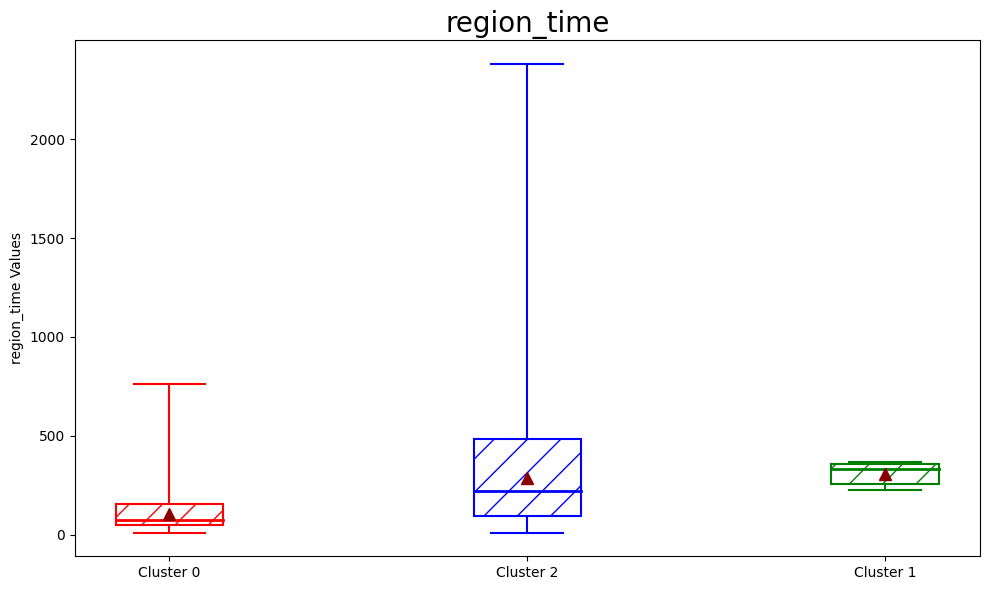

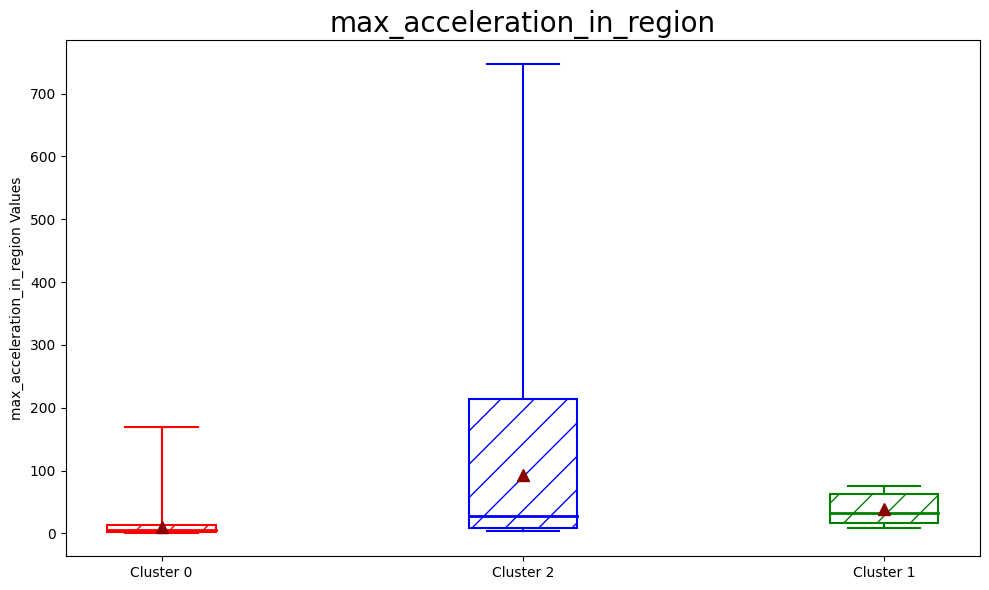

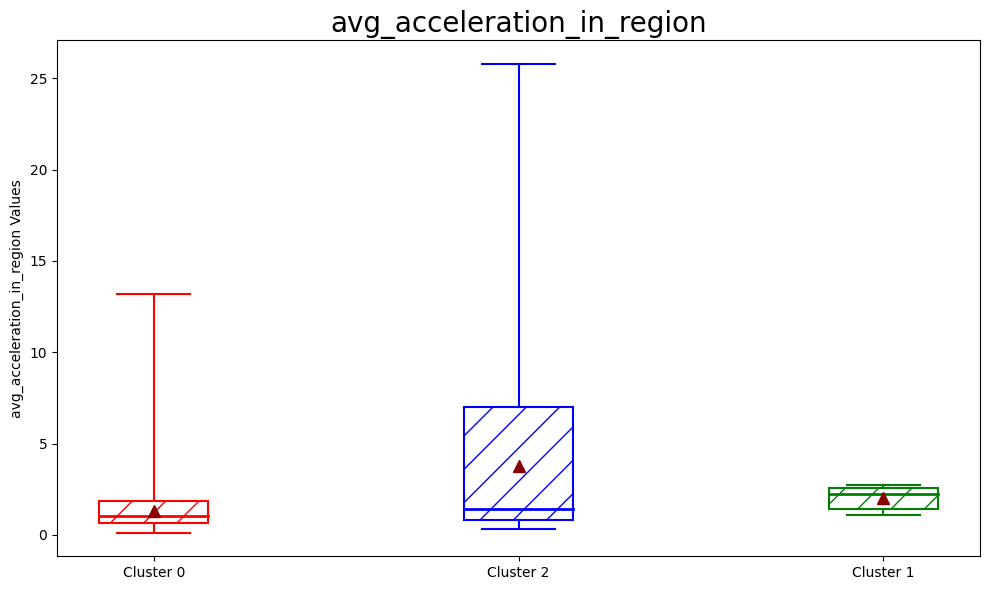

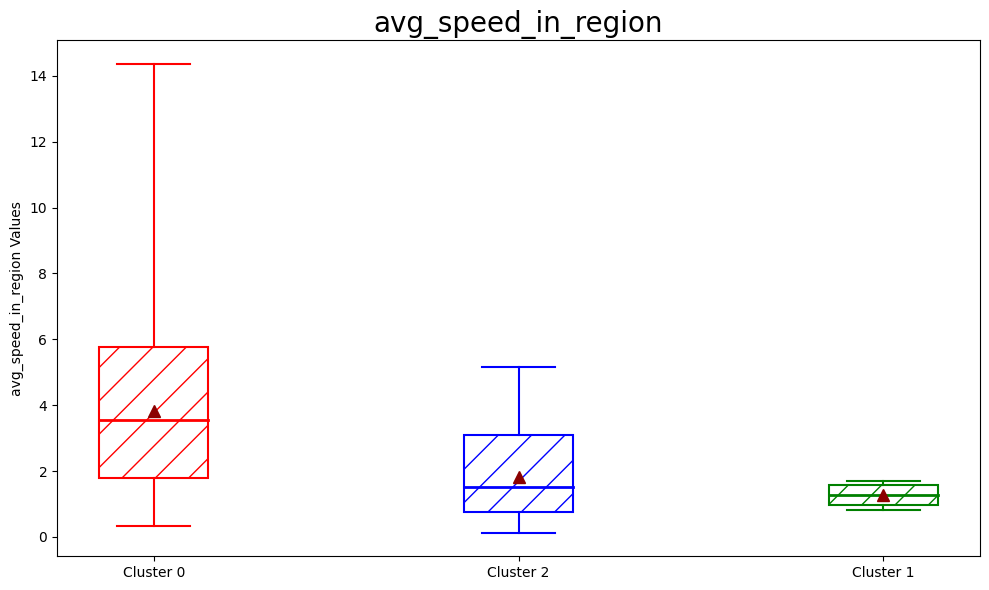

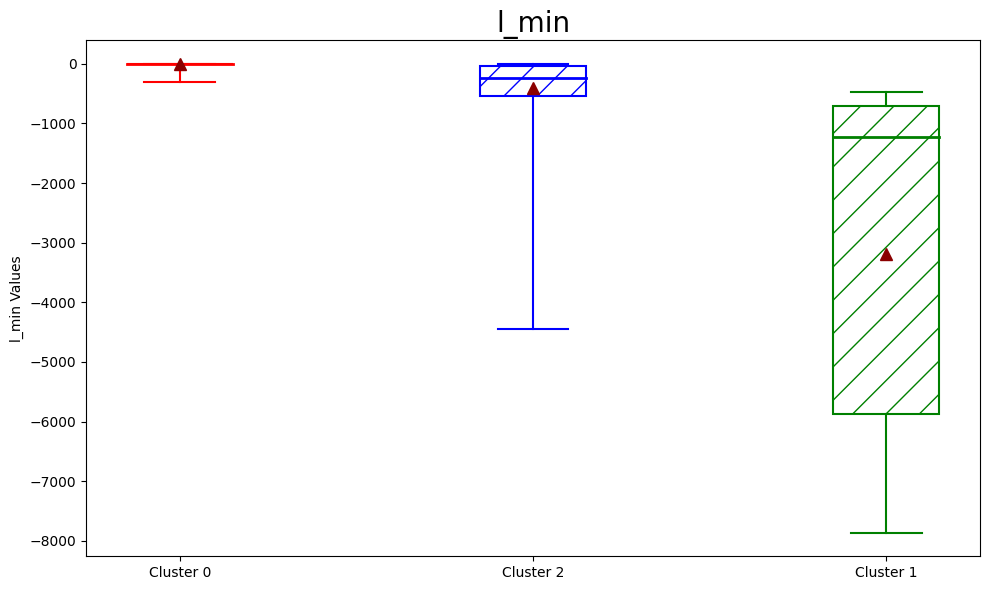

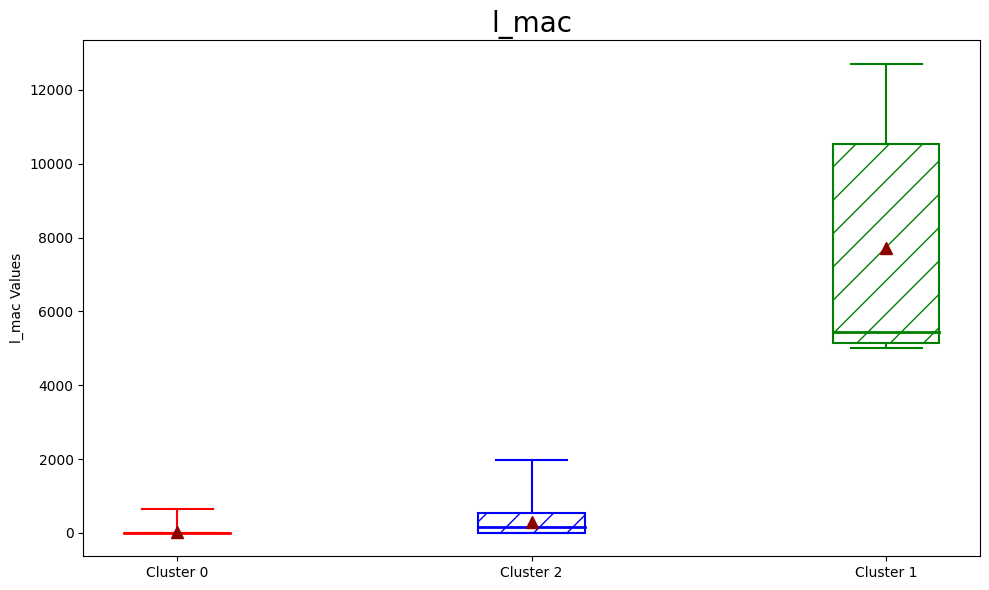

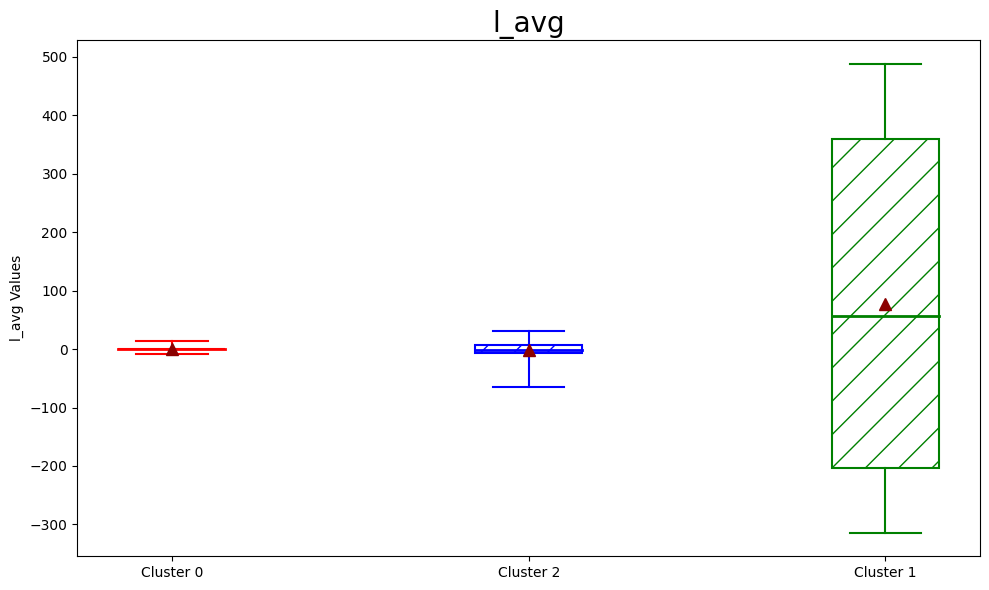

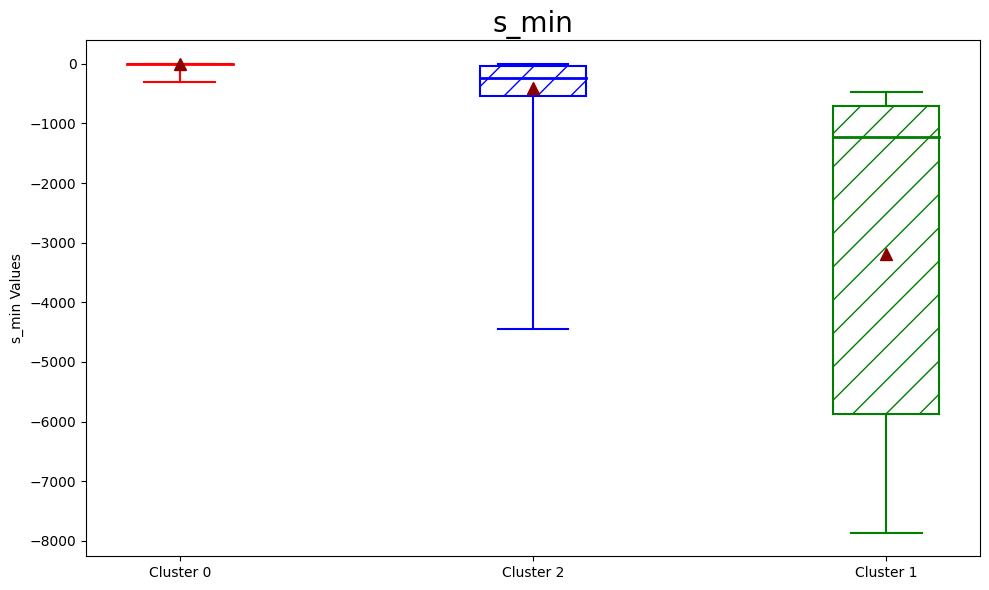

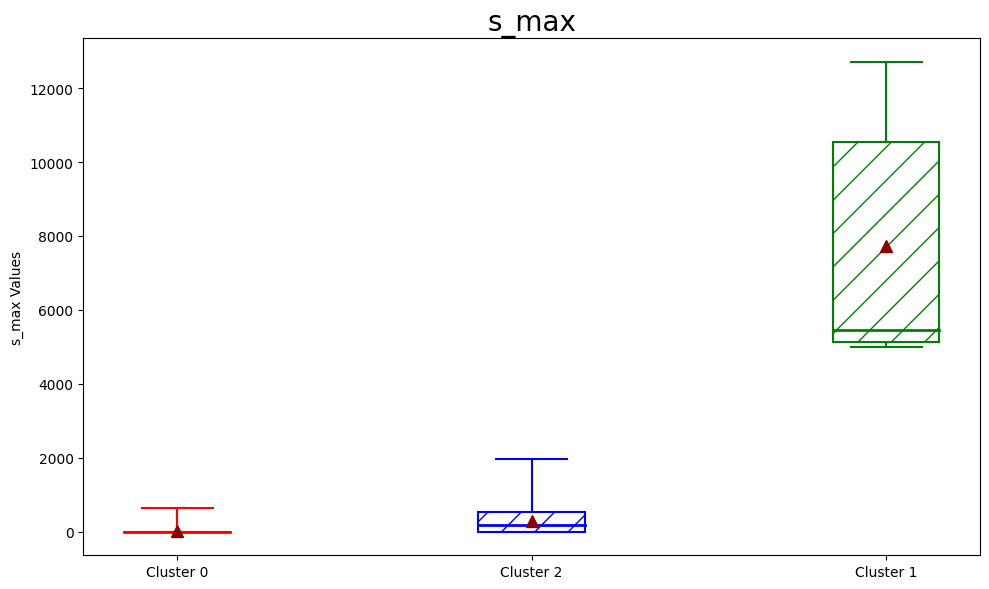

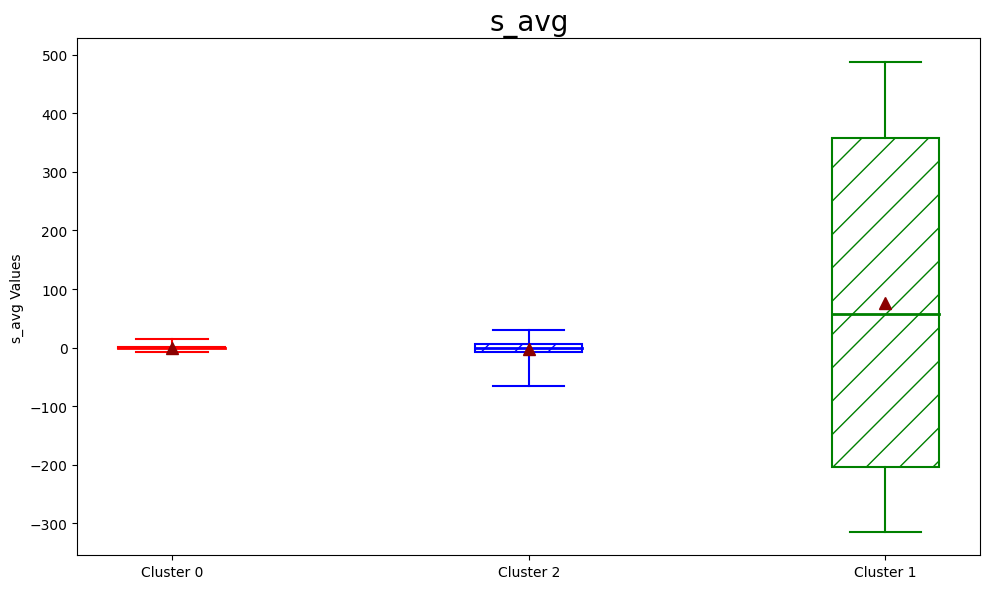

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_cluster_boxplots(df, feature, colors=None):
    """
    输入数据df和特征名，绘制不同类簇的箱线图，支持动态类簇数量，并将特征名显示为图标题。
    
    参数:
    - df: 输入的数据框，必须包含'cluster'列和要绘制的特征列
    - feature: 要绘制的特征名 (字符串)
    - colors: 可选，手动传入的颜色列表，用于控制每个类簇的颜色
    """
    # 检查数据中是否包含'cluster'列和指定特征列
    if 'cluster' not in df.columns or feature not in df.columns:
        raise ValueError("数据框必须包含'cluster'列和指定特征列")
    
    # 获取不同的类簇数量
    clusters = df['cluster'].unique()
    num_clusters = len(clusters)

    # 如果用户未传递颜色列表，则使用默认的tab10颜色映射
    if colors is None:
        colors = plt.colormaps.get_cmap('tab10', num_clusters)  # 使用matplotlib的新颜色映射方式
        colors = [colors(i) for i in range(num_clusters)]  # 将颜色映射转换为实际颜色列表

    # 创建箱型图
    fig, ax = plt.subplots(figsize=(10, 6))  # 创建一个图表及其轴对象，设置图表大小

    custom_data = []
    
    # 根据类簇数目动态创建数据结构
    for i, cluster in enumerate(clusters):
        data_cluster = df[df['cluster'] == cluster][feature]  # 获取每个类簇的特征数据
        custom_data.append({
            "data": data_cluster,  # 当前类簇的数据
            "box_color": "white",  # 箱子填充颜色
            "hatch_color": colors[i],  # 手动设置的颜色
            "hatch": '/',  # 斜线填充样式
            "line_color": colors[i],  # 竖线颜色
            "whisker_color": colors[i],  # 上端和下端的横线颜色
            "median_color": colors[i],  # 中位数线的颜色
            "mean_color": 'darkred'  # 均值点的颜色
        })

    for i, cd in enumerate(custom_data):
        data = cd["data"]  # 获取数据
        box_color = cd["box_color"]  # 获取箱子颜色
        hatch_color = cd["hatch_color"]  # 获取斜线颜色
        hatch = cd["hatch"]  # 获取填充图案
        line_color = cd["line_color"]  # 获取竖线颜色
        whisker_color = cd["whisker_color"]  # 获取上下端横线颜色
        median_color = cd["median_color"]  # 获取中位数线的颜色
        mean_color = cd["mean_color"]  # 获取均值点的颜色

        # 计算85%和15%的百分位数，均值和中位数
        percentile_85 = np.percentile(data, 85)  # 计算85百分位数
        percentile_15 = np.percentile(data, 15)  # 计算15百分位数
        mean_val = np.mean(data)  # 计算均值
        median_val = np.median(data)  # 计算中位数
        min_val = np.min(data)  # 计算最小值
        max_val = np.max(data)  # 计算最大值

        # 绘制箱型图元素
        # 绘制从最小值到箱子底部的竖线
        ax.plot([i + 1, i + 1], [min_val, percentile_15], color=line_color)  # 最小值到箱子底部的竖线
        # 绘制从最大值到箱子顶部的竖线
        ax.plot([i + 1, i + 1], [percentile_85, max_val], color=line_color)  # 最大值到箱子顶部的竖线

        # 绘制箱体
        ax.add_patch(plt.Rectangle(
            (i + 1 - 0.15, percentile_15), 0.3, percentile_85 - percentile_15,
            facecolor=box_color, hatch=hatch, edgecolor=hatch_color, linewidth=1.5))  # 绘制箱体，填充颜色和斜线颜色

        # 绘制最小值和最大值的短横线
        ax.plot([i + 1 - 0.1, i + 1 + 0.1], [min_val, min_val], color=whisker_color)  # 最小值
        ax.plot([i + 1 - 0.1, i + 1 + 0.1], [max_val, max_val], color=whisker_color)  # 最大值

        # 绘制中位数和均值
        ax.plot([i + 1 - 0.15, i + 1 + 0.15], [median_val, median_val], color=median_color, linewidth=2)  # 中位数
        ax.plot(i + 1, mean_val, '^', color=mean_color, markersize=8)  # 均值

    # 设置 X 轴标签
    ax.set_xticks(range(1, num_clusters + 1))  # 设置x轴刻度
    ax.set_xticklabels([f'Cluster {int(cluster)}' for cluster in clusters])  # 设置x轴标签

    # 设置 Y 轴标签
    ax.set_ylabel(f'{feature} Values')  # 设置y轴标签，显示特征名

    # 设置图表标题为特征名
    ax.set_title(feature, loc='center', fontsize=20)  # 设置图标题为特征名

    # 显示图表
    plt.tight_layout()  # 自动调整子图参数，避免重叠
    plt.show()  # 显示图表

# 加载Excel文件
file_path = r'D:\Desktop\SITP\车辆sitp\code\聚类分析\sitp聚类\统计数据\kmeans++_clustering_results_for_3_0920.xlsx'  # 文件路径
df = pd.read_excel(file_path, sheet_name='Sheet1')  # 读取Excel文件中的Sheet1表格

# 只选择用于聚类的数值特征（删除 'new_id', 'track_id', 'old_id', 'stationary_time_in_region'）
df = df.drop(columns=['new_id', 'track_id', 'old_id'])

# 自定义颜色
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']  # 自定义的颜色列表

# 遍历所有特征并绘制箱线图
for feature in df.columns:
    if feature != 'cluster':  # 排除cluster列本身
        plot_cluster_boxplots(df, feature, colors=custom_colors)
